In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model
from sklearn.metrics import hinge_loss
from sklearn.metrics import accuracy_score
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [90]:
dir="C:\\Users\\hp\\Desktop\\dataset\\test_set/"
categories = ['cats','dogs']
data=[]
for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)
    for img in os.listdir(path):
        imgpath=os.path.join(path,img)
        pet_img=cv2.imread(imgpath,0)
        pet_img=cv2.resize(pet_img,(128*4,64*4))
        (fd,hog_img)=hog(pet_img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
        data.append([fd,label])
print(len(data))

2000


In [2]:
import pickle

In [94]:
pick_in=open('data10.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [3]:
pick_in=open('data10.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()


In [4]:
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from numpy import mean
from numpy import std

In [5]:
random.shuffle(data)
features=[]
labels=[]
for feature ,label in data:
    features.append(feature)
    labels.append(label)

In [6]:
labels

[0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,


In [7]:
for i in range(0,len(labels)):
    if labels[i]==0:
        labels[i]=1
    elif labels[i]==1:
        labels[i]=-1
        


In [8]:
labels

[1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1

In [9]:
features=np.array(features)
labels=np.array(labels)
features=features.reshape(len(features),-1)

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=.20)
svm=SVC(kernel='poly',probability=True,random_state=42)
svm.fit(xtrain,ytrain)
ypred =svm.predict(xtest)
accuracy=accuracy_score(ytest, ypred)
Loss=list()
for i in range (1,len(ytest)):
    Loss.append(hinge_loss(ytest, ypred))

In [95]:
print("accuracy before optimization %.02f"%accuracy)

accuracy before optimization 0.73


In [53]:
lasso=linear_model.Lasso()
clf=SVC(kernel='poly',C=200,probability=True,random_state=42)
cv=ShuffleSplit(n_splits=5,test_size=.20,random_state=0)
scores=cross_val_score(clf,features,labels,cv=cv)

In [54]:
scores

array([0.7375, 0.7625, 0.735 , 0.7175, 0.745 ])

In [55]:
print("%0.2f accuracy with a standard deviation of %0.2f"%(scores.mean(),scores.std()))

0.74 accuracy with a standard deviation of 0.01


In [65]:
ypred_val=cross_val_predict(clf,xtest,ytest,cv=3)
Loss_val=list()
for i in range (0,len(ytest)):
    Loss_val.append(hinge_loss(ytest, ypred_val))

In [67]:
Loss_val

[0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,


In [132]:
categories={1:'cat',-1:'dog'}

In [146]:
print(ypred_val[10])
print(categories[ypred_val[10]])


1
cat


In [147]:
print(ytest[10])
categories[ytest[10]]

1


'cat'

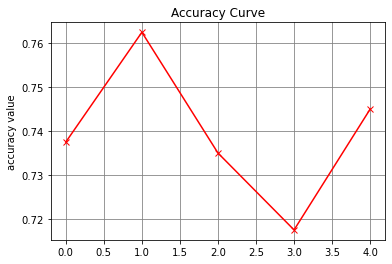

In [58]:
x=np.array(scores)
plt.title("Accuracy Curve")
plt.ylabel("accuracy value")
plt.plot()
plt.grid(color='gray')
plt.plot(x,c='red',marker='x')
#plt.plot(x,linestyle='dotted',color='green',marker='x')
plt.show()

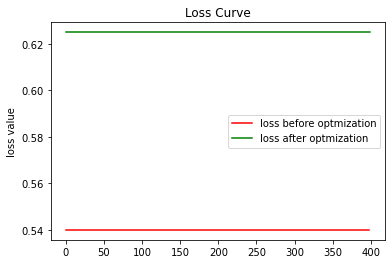

In [152]:
x=np.array(Loss)
y=np.array(Loss_val)
plt.title("Loss Curve")
plt.ylabel("loss value")
plt.plot(x,color='red')
plt.plot(y,color='green')
plt.legend(['loss before optmization','loss after optmization'],loc="center right")
plt.show()

In [153]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

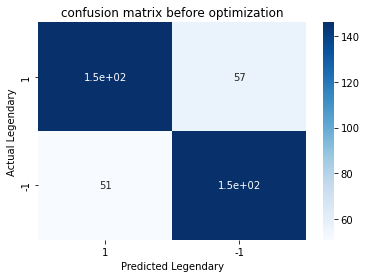

In [148]:
cfmatrix =confusion_matrix(ytest,ypred)
ax = sns.heatmap(cfmatrix,annot=True, cmap=plt.cm.Blues)
ax.set_xlabel('Predicted Legendary')
ax.set_ylabel('Actual Legendary');
ax.xaxis.set_ticklabels(['1','-1'])
ax.yaxis.set_ticklabels(['1','-1'])
plt.title('confusion matrix before optimization')
## Display the visualization of the Confusion Matrix.
plt.show()

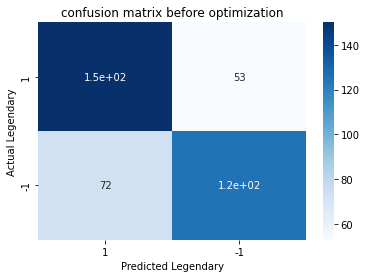

In [149]:
cfmatrix =confusion_matrix(ytest,ypred_val)
ax = sns.heatmap(cfmatrix,annot=True, cmap=plt.cm.Blues)
ax.set_xlabel('Predicted Legendary')
ax.set_ylabel('Actual Legendary');
ax.xaxis.set_ticklabels(['1','-1'])
ax.yaxis.set_ticklabels(['1','-1'])
plt.title('confusion matrix before optimization')
## Display the visualization of the Confusion Matrix.
plt.show()

Text(0.5, 0, 'False Positive Rate')

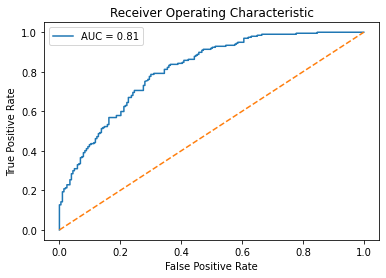

In [150]:
from sklearn.metrics import roc_curve, auc
probabilities = svm.predict_proba(xtest)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')